<a href="https://colab.research.google.com/github/nenipam/convoeval/blob/main/102117082_AnupamNainiwal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Anupam Nainiwal**  
Email: `anainiwal_be21@thapar.edu`  
Roll No: **102117082**  
Group: **4CS3**  
Start Timestamp: 20240911-1038  

## Question

Table of Contents
_________________

1. Logistics
2. Task
3. Deliverables
4. Evaluation
5. Note
6. Struts


1 Logistics
===========

  + Start time: Wed Sep 11 10:00 AM
  + End Time: Wed Sep 11 04:00 PM
  + Submission Form:
    <https://docs.google.com/forms/d/e/1FAIpQLSc2aAG33E0rQgs3OsrpyjyREwy9OKK_WnKqmBLvD7pzM4sOvg/viewform?usp=sf_link>
  + Viva Voce: Will be notified later.


2 Task
======

  Consider the paper: <https://arxiv.org/abs/1804.03209>

  1. Read and summarise the paper in about 50 words.
  2. Download the dataset in the paper, statistically analyse and
     describe it, so that it may be useful for posterity. (Include code
     snippets in your .ipynb file to evidence your analysis.)
  3. Train a classifier so that you are able to distinguish the commands
     in the dataset.
  4. Report the performance results using standard benchmarks.
  5. Record about 30 samples of each command in your voice and create a
     new dataset (including a new user id for yourself).  You may use a
     timer on your computer to synchronise.
  6. Fine tune your classifier to perform on your voice.
  7. Report the results.


3 Deliverables
==============

  1. A PDF Report: (as a part of your Git Repo) named
     <ROLL_NO>-report.pdf
  2. Assets: Your pretrained classifier model weights and your cleaned
     and well-formed dataset.  This should be a part of your google
     drive with read access to your instructor <bv.raghav@thapar.edu>
  3. A demo notebook: (as a part of your Git Repo), that loads both your
     model and dataset; and runs to show the results.
  4. The demo notebook should verify the assets using a checksum
     (md5/sha/…).  This step verifies that the assets have not been
     tampered with at a later stage.


4 Evaluation
============

  1. Clarity of thought process and presentation.
  2. Data processing skills.
  3. Model fine tuning/ training skills.
  4. Details of progress, as in what were the encountered problems and
     how were they solved.
  5. How adaptable is your pipeline? (as in, how easy is it for me to
     adapt it for my voice)
  6. How scalable is your approach? (as in, how easy is it to scale it
     to many new voices)
  7. Strengths and Shortcomings of your approach.


5 Note
======

  1. This is a test of how fast can we report the performance of a model
     for a specific task.  The best performance is not expected; but a
     holistic pipeline is.
  2. You may improve upon it in future, out of interest; though it
     wouldn’t influence your eval.


6 Struts
========

  The following tutorials may be a good start point; there maybe more on
  the internet.  You are free to choose.
  1. <https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/c64f4bad00653411821adcb75aea9015/speech_command_classification_with_torchaudio_tutorial.ipynb#scrollTo=i0pBRWkcxWrX>
  2. <https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/audio/simple_audio.ipynb>

## Solution

In [ ]:
data_dir = '/content'

In [ ]:
import os
print(os.listdir('/content'))

['.config', 'speech_commands_v0.02.tar.gz', 'right', 'eight', 'two', 'on', 'dog', 'bed', 'no', 'nine', 'cat', 'one', 'up', 'five', 'backward', 'left', 'learn', '1804.03209v1.pdf', 'marvin', 'README.md', 'speech_commands_v0.02.tar.gz.1', 'go', 'follow', 'tree', 'off', 'validation_list.txt', 'testing_list.txt', 'stop', 'zero', 'six', 'visual', '.DS_Store', 'down', 'forward', 'LICENSE', 'happy', 'house', 'three', '_background_noise_', 'sheila', 'wow', 'seven', 'four', 'yes', 'bird', 'sample_data']


In [ ]:

commands = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print(f"Commands in the dataset: {commands}")

file_counts = {command: len(os.listdir(os.path.join(data_dir, command))) for command in commands}
print(f"Number of files per command: {file_counts}")


Commands in the dataset: ['.config', 'right', 'eight', 'two', 'on', 'dog', 'bed', 'no', 'nine', 'cat', 'one', 'up', 'five', 'backward', 'left', 'learn', 'marvin', 'go', 'follow', 'tree', 'off', 'stop', 'zero', 'six', 'visual', 'down', 'forward', 'happy', 'house', 'three', '_background_noise_', 'sheila', 'wow', 'seven', 'four', 'yes', 'bird', 'sample_data']
Number of files per command: {'.config': 10, 'right': 3778, 'eight': 3787, 'two': 3880, 'on': 3845, 'dog': 2128, 'bed': 2014, 'no': 3941, 'nine': 3934, 'cat': 2031, 'one': 3890, 'up': 3723, 'five': 4052, 'backward': 1664, 'left': 3801, 'learn': 1575, 'marvin': 2100, 'go': 3880, 'follow': 1579, 'tree': 1759, 'off': 3745, 'stop': 3872, 'zero': 4052, 'six': 3860, 'visual': 1592, 'down': 3917, 'forward': 1557, 'happy': 2054, 'house': 2113, 'three': 3727, '_background_noise_': 7, 'sheila': 2022, 'wow': 2123, 'seven': 3998, 'four': 3728, 'yes': 4044, 'bird': 2064, 'sample_data': 6}


Mean duration: 0.9846485000236217
Max duration: 95.183125
Min duration: 0.2133125
Standard deviation: 0.5082371690052288


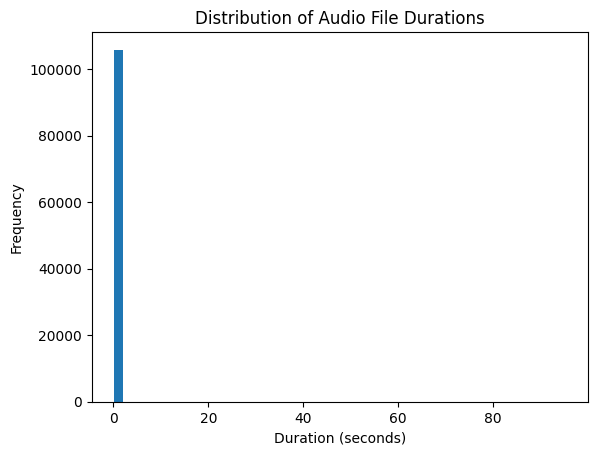

In [ ]:
import wave
import numpy as np
from collections import Counter

def get_audio_properties(filename):
    with wave.open(filename, 'r') as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        return duration, rate

durations = []
for command in commands:
    class_dir = os.path.join(data_dir, command)
    if os.path.isdir(class_dir):
        for filename in os.listdir(class_dir):
            filepath = os.path.join(class_dir, filename)
            try:
                duration, rate = get_audio_properties(filepath)
                durations.append(duration)
            except:
                pass

durations = np.array(durations)
print(f"Mean duration: {np.mean(durations)}")
print(f"Max duration: {np.max(durations)}")
print(f"Min duration: {np.min(durations)}")
print(f"Standard deviation: {np.std(durations)}")

import matplotlib.pyplot as plt

plt.hist(durations, bins=50)
plt.title('Distribution of Audio File Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import tensorflow as tf
import pathlib

batch_size = 32
sampling_rate = 16000

data_dir = pathlib.Path(data_dir)

def decode_audio(audio_binary):
    audio, _ = tf.audio.decode_wav(audio_binary)
    return tf.squeeze(audio, axis=-1)

def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2]

def preprocess(file_path):
    audio_binary = tf.io.read_file(file_path)
    audio = decode_audio(audio_binary)
    label = get_label(file_path)
    return audio, label

file_paths = [str(p) for p in data_dir.glob('*/*.wav')]
labels = [p.parts[-2] for p in data_dir.glob('*/*.wav')]

ds = tf.data.Dataset.from_tensor_slices((file_paths, labels))
ds = ds.map(lambda x, y: preprocess(x), num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds = ds.batch(batch_size)
ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [ ]:
from tensorflow.keras import layers, models

# Build a simple CNN model
model = models.Sequential([
    layers.Input(shape=(sampling_rate, 1)),
    layers.Conv1D(16, kernel_size=3, strides=1, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, kernel_size=3, strides=1, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(commands), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the dataset into training and validation sets
train_size = int(0.8 * len(file_paths))
train_ds = ds.take(train_size)
val_ds = ds.skip(train_size)

# Train the model
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

# Evaluate the model
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
print(f"Test accuracy: {test_acc}")


Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/Cast defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-23-bc59da08cf2c>", line 26, in <cell line: 26>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 357, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 325, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 39, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/tree/tree_api.py", line 148, in map_structure

  File "/usr/local/lib/python3.10/dist-packages/keras/src/tree/optree_impl.py", line 79, in map_structure

  File "/usr/local/lib/python3.10/dist-packages/optree/ops.py", line 747, in tree_map

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 40, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/core.py", line 743, in convert_to_tensor

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/core.py", line 120, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/sparse_categorical_crossentropy/Cast}}]] [Op:__inference_one_step_on_iterator_3379]